In [1]:
from sklearn.model_selection import train_test_split
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('../../')

from package.data.glm import simple_data
from package.glm.glm import fit_wo_con, fit_w_con, compute_temp_eff_dim
from package.plot_utils.glm import plot_loss_and_ed
from package.directories import eigenvalues_dir
from package.plot_utils.common import *


df = simple_data(num_samples=100000, cap_at=3)

train, test = train_test_split(df, test_size=0.3, random_state=42)


class FormulaOption:
    name: str
    formula: str

    def __init__(self, name: str, formula: str) -> None:
        self.name = name
        self.formula = formula

# Without Constraint

/Users/chihiro/.pyenv/versions/3.9.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Computing EDs: 100%|██████████| 10/10.0 [00:21<00:00,  2.10s/it]
Computing EDs: 100%|██████████| 8/8.0 [00:14<00:00,  1.75s/it]
Computing EDs: 100%|██████████| 8/8.0 [00:12<00:00,  1.55s/it]


Text(0.5, 0.98, 'Evolution of Normalized Effective Dimension during Training (without Constraints)')

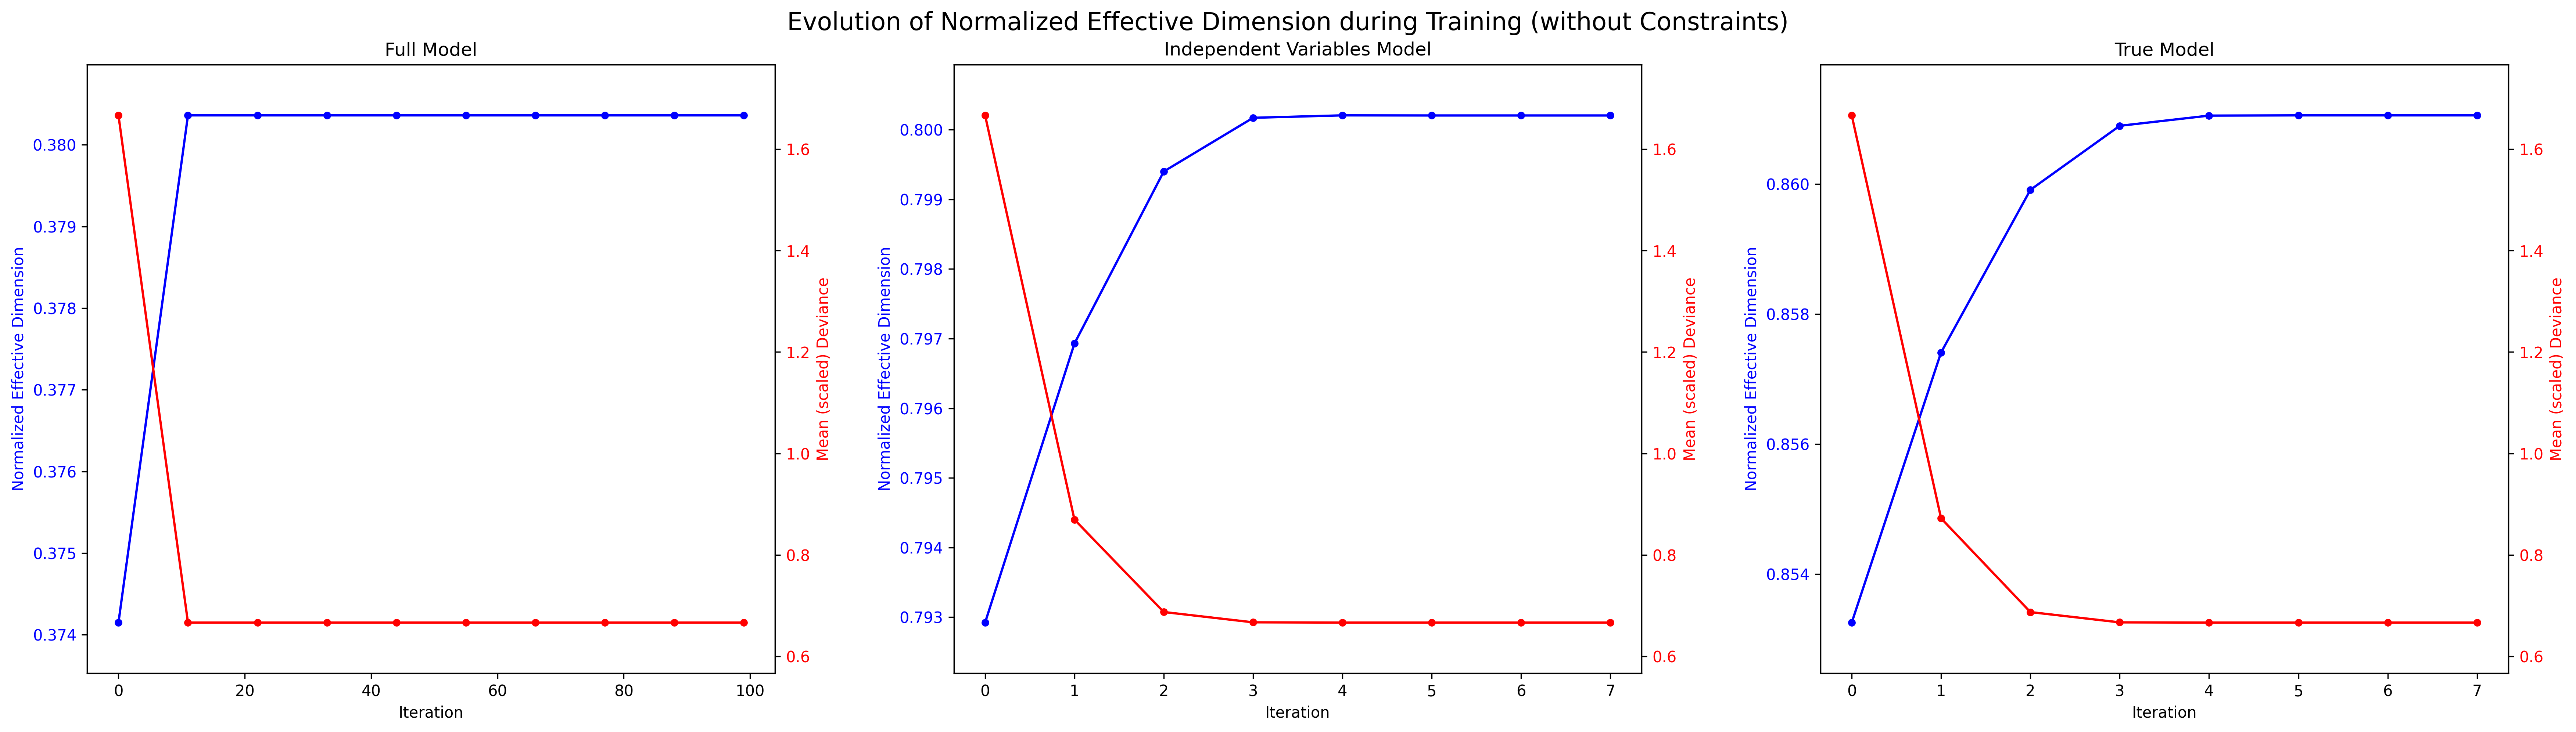

In [3]:
fig, axs = plt.subplots(1, 3, figsize=THREE_PLOTS_FIGSIZE, dpi=DPI)

formula_options = [
    FormulaOption('Full Model', 'y ~ A + B + C + D + E + F + G + 0'),
    FormulaOption('Independent Variables Model', 'y ~ A + B + C + 0'),
    FormulaOption('True Model', 'y ~ A + B + 0'),
]

for i, option in enumerate(formula_options):
    model, parameters, result = fit_wo_con(train, option.formula)

    steps, eff_dims = plot_loss_and_ed(model.exog, [], model.endog, [], parameters, model.exog, 5e-3, model.exog.shape[0], 
                    save_dir=os.path.join(eigenvalues_dir, 'temp'), num_steps=10, ax=axs[i], title=option.name, show=False, batch_size=10)
    
fig.tight_layout(pad=3)
fig.suptitle('Evolution of Normalized Effective Dimension during Training (without Constraints)', fontsize=16)

/Users/chihiro/.pyenv/versions/3.9.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Computing EDs: 100%|██████████| 10/10.0 [00:21<00:00,  2.20s/it]
Computing EDs: 100%|██████████| 8/8.0 [00:14<00:00,  1.77s/it]
Computing EDs: 100%|██████████| 8/8.0 [00:10<00:00,  1.31s/it]


Text(0.5, 0.98, 'Evolution of Normalized Effective Dimension during Training (with Constraints)')

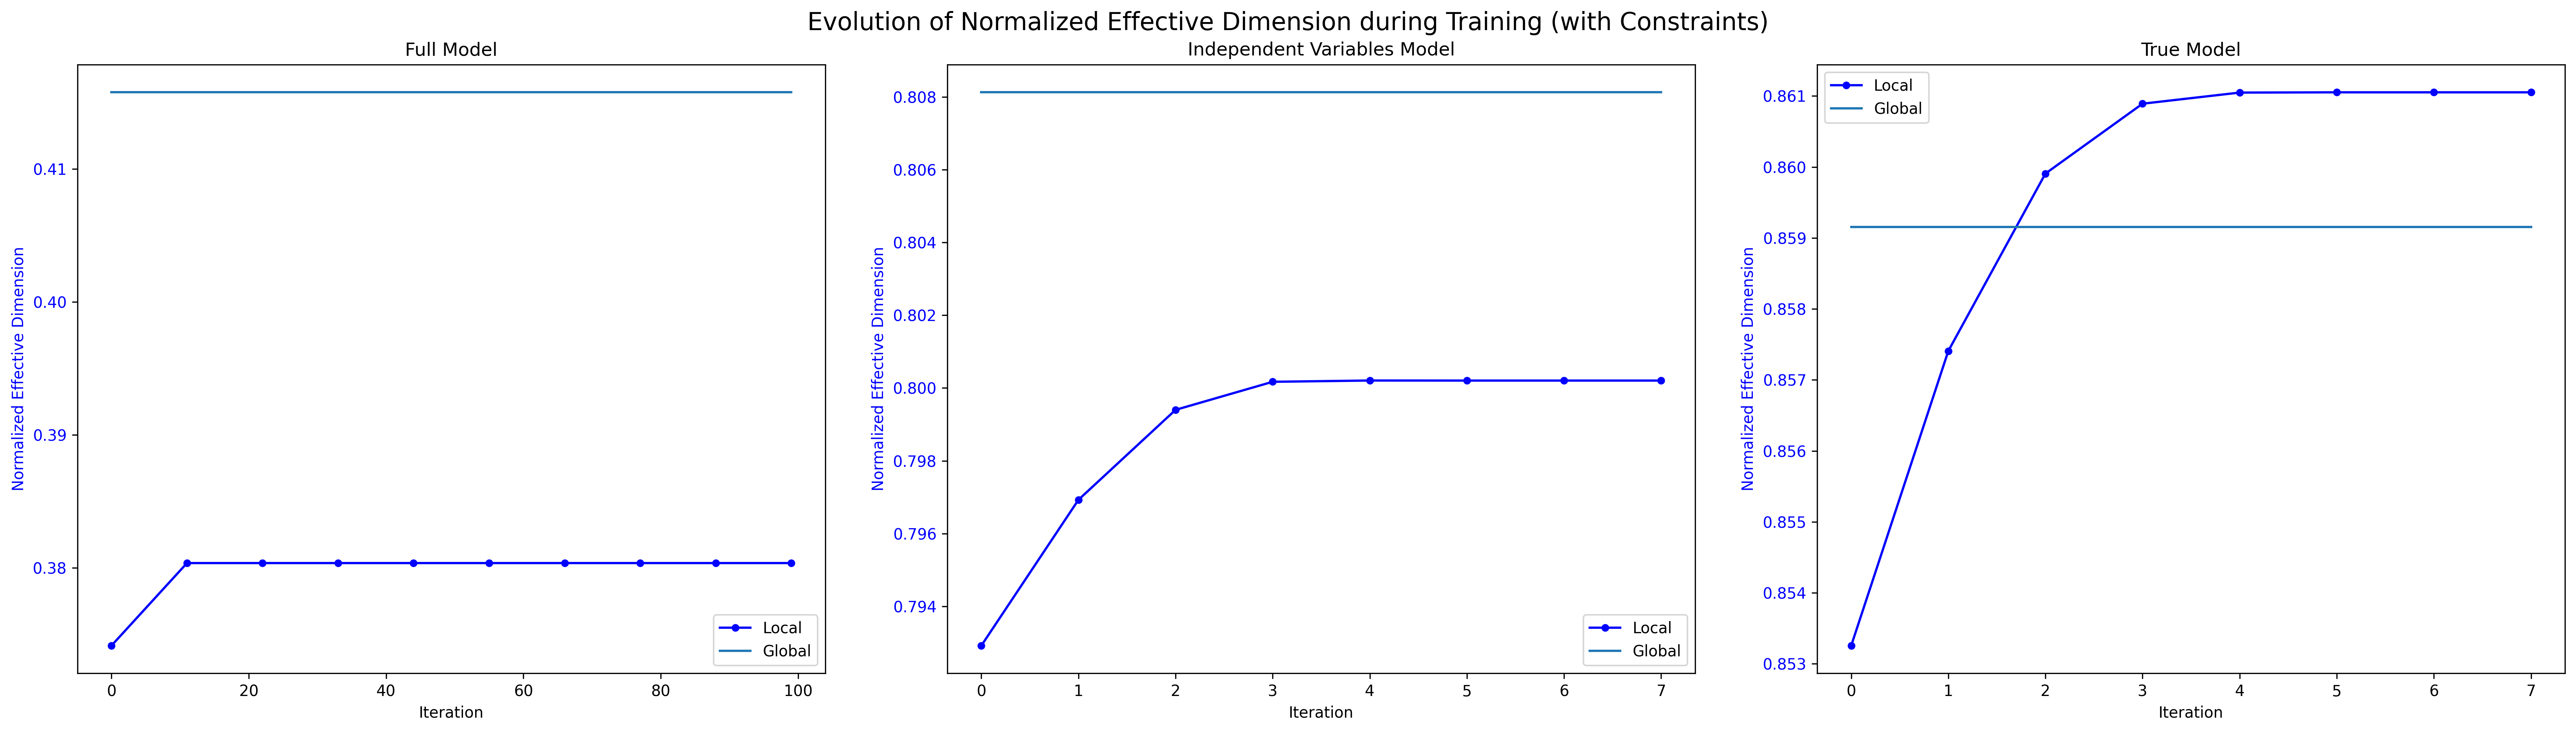

In [4]:
fig, axs = plt.subplots(1, 3, figsize=THREE_PLOTS_FIGSIZE, dpi=DPI)

formula_options = [
       FormulaOption('Full Model', 'y ~ A + B + C + D + E + F + G + 0'),
    FormulaOption('Independent Variables Model', 'y ~ A + B + C + 0'),
    FormulaOption('True Model', 'y ~ A + B + 0'),
]

for i, option in enumerate(formula_options):
    model, parameters, result = fit_wo_con(train, option.formula)

    global_ed = compute_temp_eff_dim(train, option.formula, num_betas=1000, batch_size=1000)[0] / model.exog.shape[1]

    steps, eff_dims = plot_loss_and_ed(model.exog, [], model.endog, [], parameters, model.exog, 5e-3, model.exog.shape[0], 
                    save_dir=os.path.join(eigenvalues_dir, 'temp'), num_steps=10, ax=axs[i], title=option.name, show=False, global_eff_dim=global_ed, batch_size=10)
    
fig.tight_layout(pad=3)
fig.suptitle('Evolution of Normalized Effective Dimension during Training (with Constraints)', fontsize=16)

# With Constraint

Computing EDs: 100%|██████████| 10/10.0 [00:25<00:00,  2.57s/it]
Computing EDs: 100%|██████████| 9/9.0 [00:16<00:00,  1.82s/it]
Computing EDs: 100%|██████████| 8/8.0 [00:14<00:00,  1.78s/it]


Text(0.5, 0.98, 'Evolution of Normalized Effective Dimension during Training (with Constraints)')

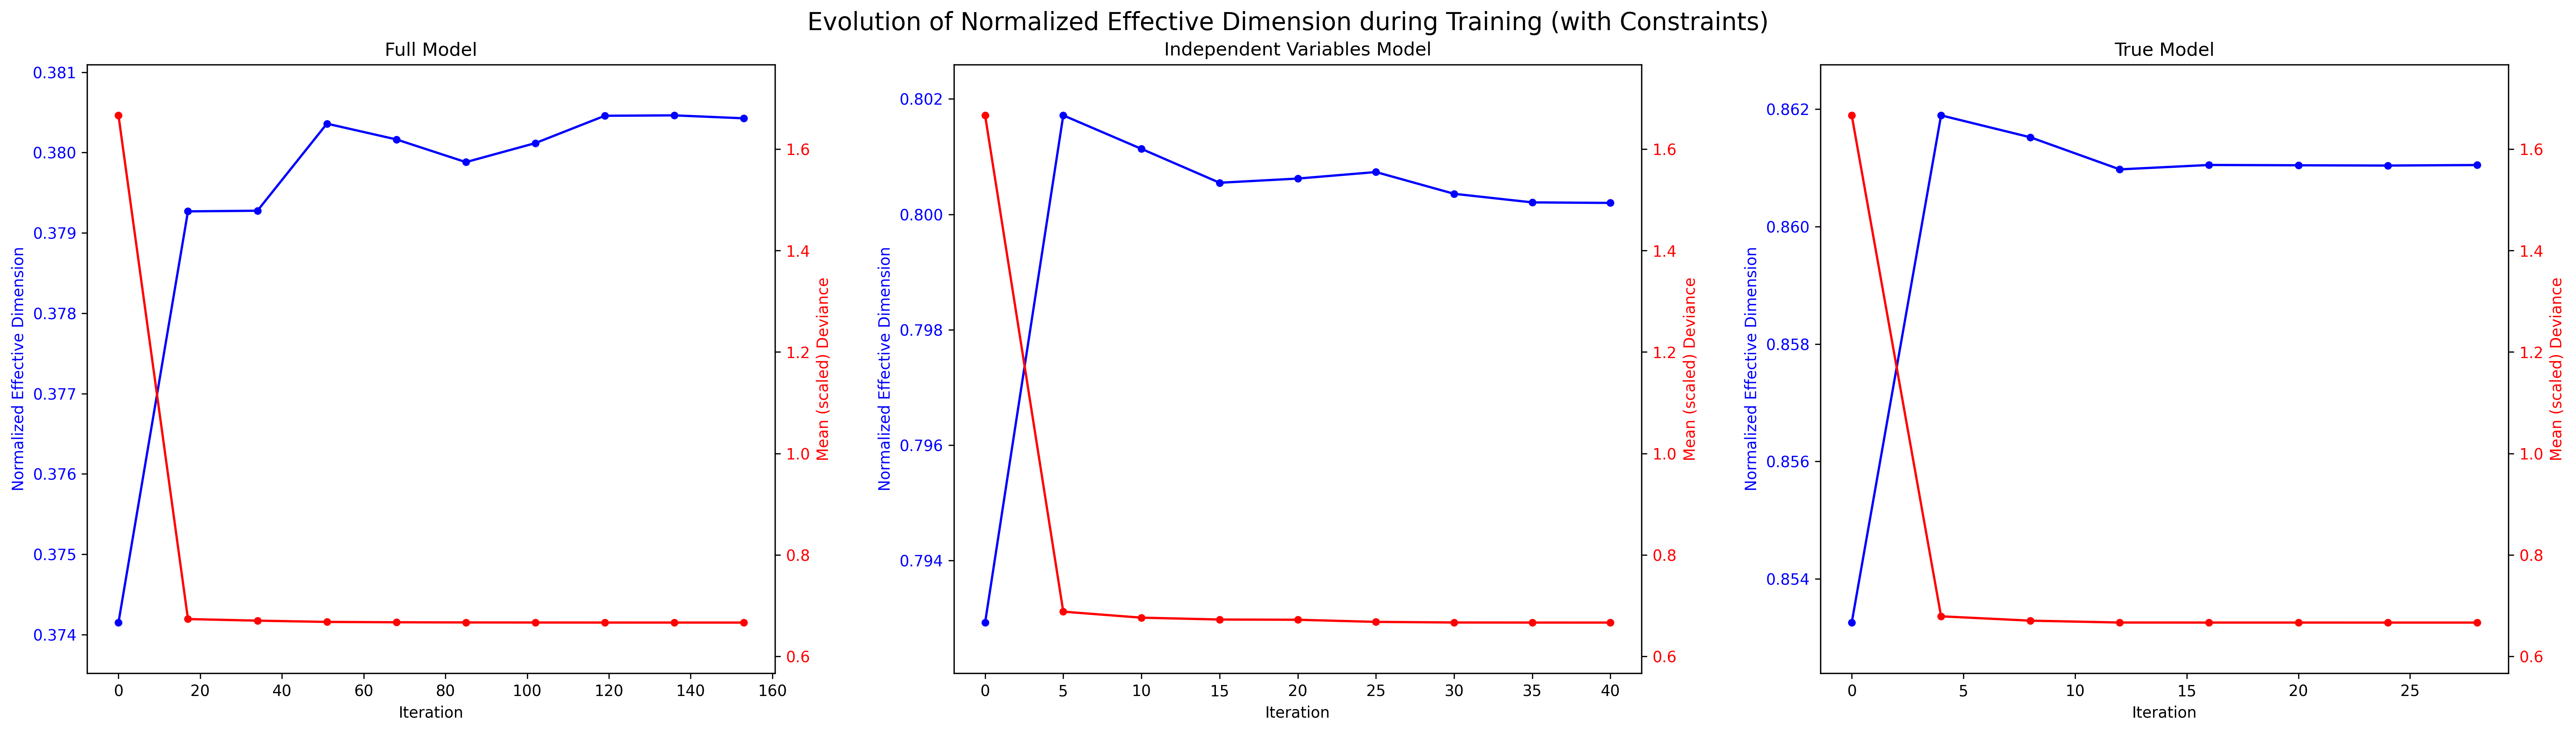

In [2]:
fig, axs = plt.subplots(1, 3, figsize=THREE_PLOTS_FIGSIZE, dpi=DPI)


formula_options = [
    FormulaOption('Full Model', 'y ~ A + B + C + D + E + F + G + 0'),
    FormulaOption('Independent Variables Model', 'y ~ A + B + C + 0'),
    FormulaOption('True Model', 'y ~ A + B + 0'),
]

for i, option in enumerate(formula_options):
    x, y, parameters, result = fit_w_con(train, option.formula, 0.01, 0.5)

    steps, eff_dims = plot_loss_and_ed(x, [], y, [], parameters, x, 5e-3, x.shape[0], 
                    save_dir=os.path.join(eigenvalues_dir, 'temp'), num_steps=10, ax=axs[i], title=option.name, show=False, batch_size=10)
    
fig.tight_layout(pad=3)
fig.suptitle('Evolution of Normalized Effective Dimension during Training (with Constraints)', fontsize=16)